In [38]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [39]:
# Load the breast cancer dataset
data = load_breast_cancer()

# Convert to pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = (data.target == 0).astype(int)  # Binary target: 0 (malignant) -> 1, 1 (benign) -> 0

# Split the dataset into 70% training and 30% testing
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Optionally, convert back to DataFrame after scaling
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train.shape

(398, 30)

In [40]:
# Perform logistic regression
em_model = LogisticRegression()
em_model.fit(X_train, y_train)

# Compute the accuracy of the model
y_pred = em_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

/home/gui_ze/anaconda3/envs/aprendizagem-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9707602339181286

In [41]:
# Perform Gaussian Mixture Model clustering
em_models = []
accuracies = []
for k in range(2, 11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_train)
    y_pred = gmm.predict(X_test)
    score = silhouette_score(X_test, y_pred)
    accuracies.append(score)
    em_models.append(gmm)

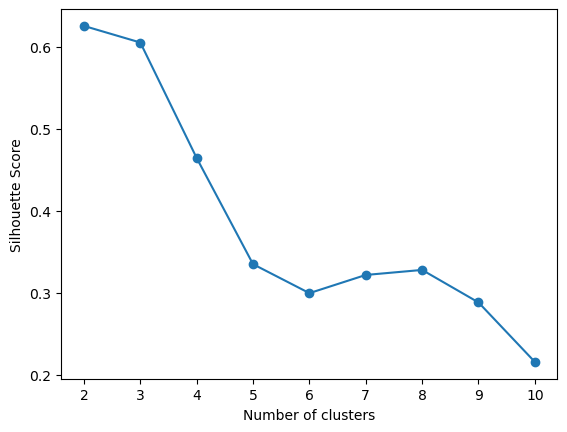

In [42]:
# Plot the silhoette results
import matplotlib.pyplot as plt

plt.plot(range(2, 11), accuracies, marker='o')

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.show()

The number of clusters with the highest silhouette aligns perfectly with the problem. With a binary target variable we got k = 2 as the optimal number of clusters.

## Mapping the dataset into probability values
We are going to transform this dataset by mapping every observation in probability values for each of the 2 clusters.

In [43]:
# For every model, apply the transformation and store it
X_train_transformed = []
X_test_transformed = []
for em_model in em_models:
    X_train_transformed.append(em_model.predict_proba(X_train))
    X_test_transformed.append(em_model.predict_proba(X_test))

In [44]:
# Perform logistic regression on the transformed data
accuracies = []

for i in range(len(em_models)):
    model = LogisticRegression()
    model.fit(X_train_transformed[i], y_train)
    y_pred = model.predict(X_test_transformed[i])
    score = accuracy_score(y_test, y_pred)
    accuracies.append(score)